In [1]:
import numpy as np
import colours
from colours import color_word, color_std, color
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
colours.color_word

['RED', 'GREEN', 'BLUE', 'CYAN', 'ORANGE', 'BLACK', 'WHITE', 'YELLOW']

In [3]:
warm = np.array([.3, .05, .09, .06, .35, .01, .01, .23])
cold = np.array([.03, .35, .35, .2, .03, .01, .01, .02])

TOPICS = np.stack([warm, cold])
TOPICS.shape

(2, 8)

In [4]:
np.random.multinomial(4, warm)

array([2, 0, 0, 1, 0, 0, 0, 1])

In [5]:
# hyperparameter
K = 2
alpha = 0.1*np.ones(K) # np.random.gamma(shape=gamma_shape, scale=gamma_scale, size=k)

# image level
D = 10
N = 4  # number of regions in a image
M = np.random.randint(1, 5, D)
THETA = np.random.dirichlet(alpha, D)


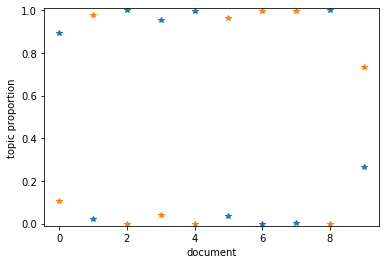

In [6]:
plt.plot(THETA, '*') # documents x topics
plt.ylim(-.01, 1.01)
plt.xlabel("document")
plt.ylabel("topic proportion");

In [14]:
images = []
captions = []

for d in range(D):
    Z = np.random.multinomial(1, THETA[d,], N)
    per_square_prob = Z @ TOPICS
    per_square = np.array([np.random.multinomial(1, per_square_prob[n]) for n in range(N)])
    im_colors = per_square @ np.array(colours.color)
    image = np.zeros([400, 400, 3], np.uint8)
    image[0:200, 0:200, :] = np.clip(im_colors[0] + np.random.randn(3) * color_std, 0, 1) * 255
    image[0:200, 200:, :] = np.clip(im_colors[1] + np.random.randn(3) * color_std, 0, 1) * 255
    image[200:, 0:200, :] = np.clip(im_colors[2] + np.random.randn(3) * color_std, 0, 1) * 255
    image[200:, 200:, :] = np.clip(im_colors[3] + np.random.randn(3) * color_std, 0, 1) * 255
    images.append(image)
    
    Y = np.random.permutation(N)[:M[d]]
    caption = [color_word[i] for i in np.unique(per_square[Y].argmax(-1))]
    captions.append(caption)

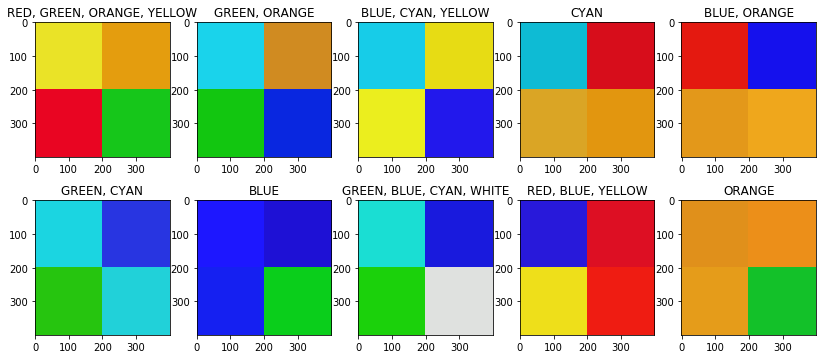

In [15]:
plt.figure(figsize=(14,6))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(images[i])
    plt.title(', '.join(captions[i]))

### This might not work because:

* This has each COLOR with its own mean and variance
* CorrLDA has each TOPIC with its own mean and variance
* This will only make sense if all the different colors within a topic are really very similar (all blues, or all reds, maybe?)

It could be worth trying in a few ways:

* With 2 topics (can it recover "warm" and "cool"?)
* With 2 topics, but PLAIN LDA ON CAPTIONS ONLY (this should be a little more likely to work, because then it just needs the topic vector…)
* With # topics = # colors (in this case, can you find the original colors, and maybe even match them with their words?). This failed before by learning the same topic for all colors, which could happen again.

If all of this doesn't work well, then it's worth discussing why it is hard to make synthetic data for testing CorrLDA (in contrast to LDA, where it is a bit easier).

Then you can move on to (preliminary) work on the real data:

* Can you run "plain" LDA on just the captions for the birds, without the images? (baseline -- might be able to learn something about different "sorts" of birds?)
* Try out CorrLDA implementation and see what happens
* Think whether there is something else simple to try out?